In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

x = np.random.rand(100, 1)
y = 2 + 3*x + np.random.rand(100,1 )

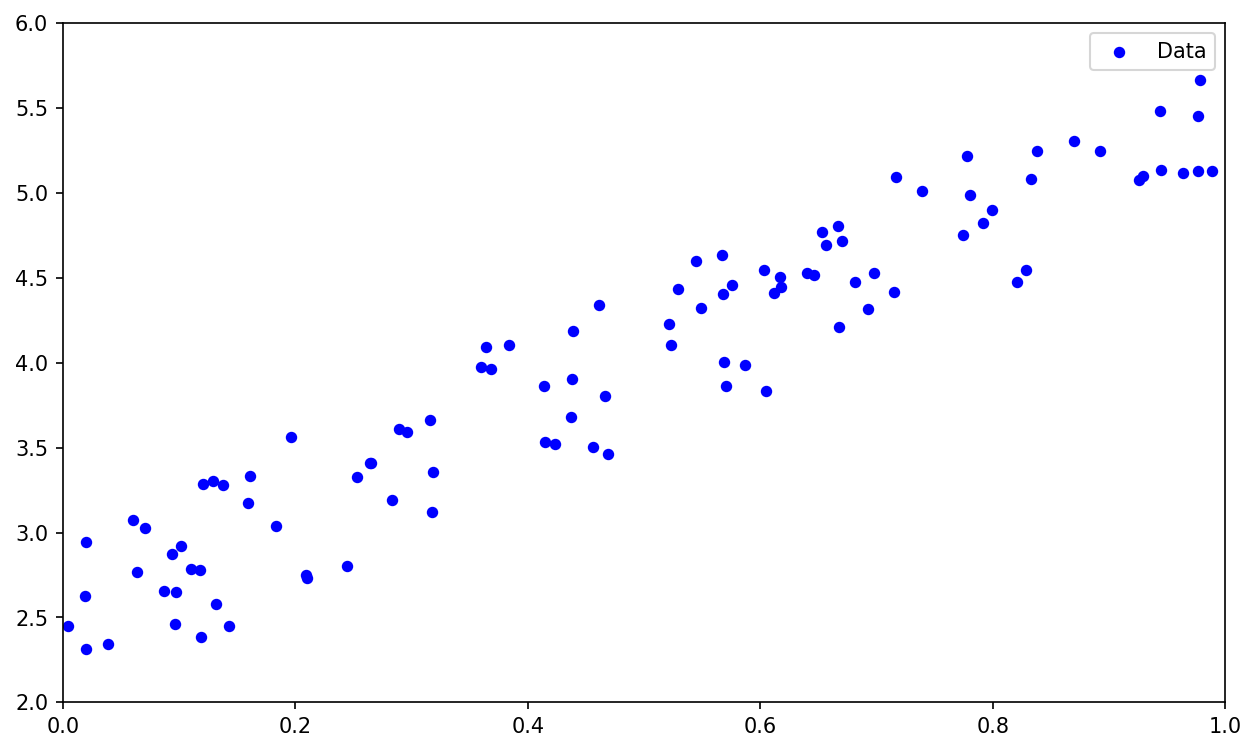

In [3]:
plt.figure(figsize =(10,6), dpi = 150)
plt.ylim(2,6)
plt.xlim(0, 1)
plt.scatter(x, y, s = 20, color = 'blue', label = 'Data')
plt.legend()
plt.show()

In [10]:
n = x.shape[0]
x_train = np.c_[np.ones((n,1)),x]
beta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)),np.dot(x_train.T, y))

In [13]:
mse = ((y - np.dot(x_train, beta))**2/n).sum()
print("MSE: ",mse)

MSE:  0.0762332458287501


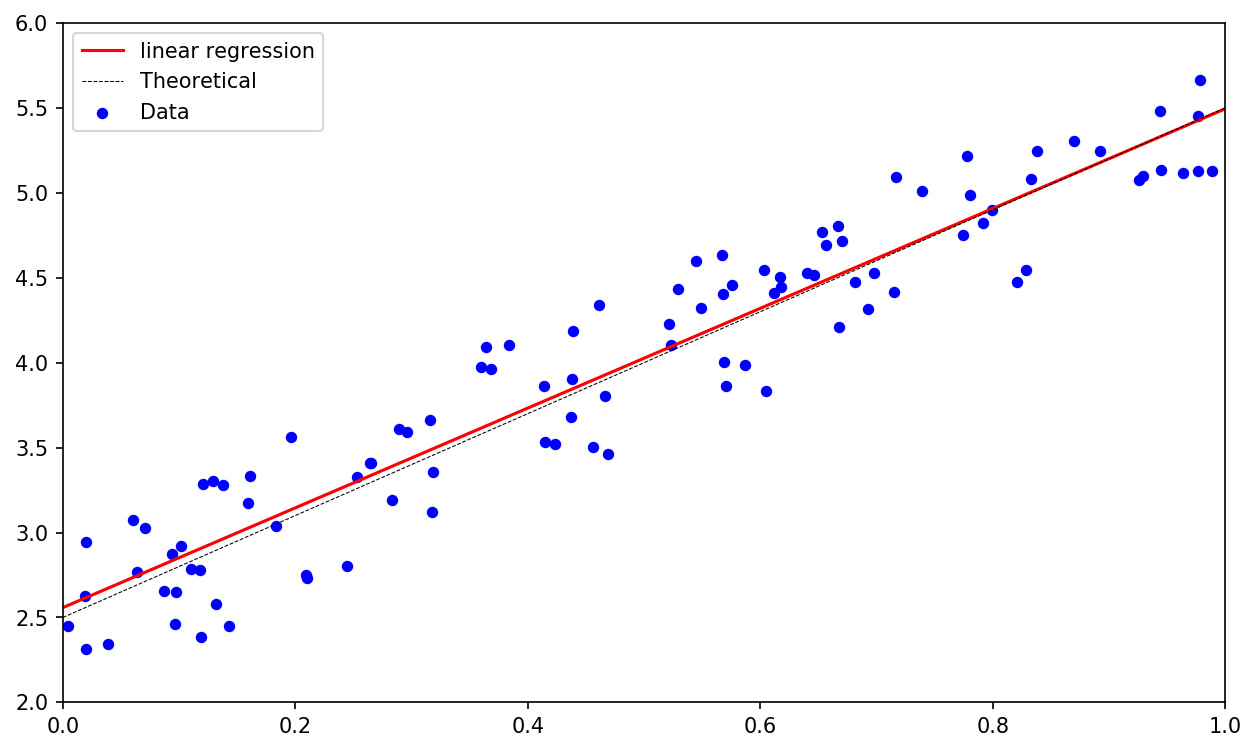

In [17]:
x_plot = np.linspace(0,1,100)

plt.figure(figsize =(10,6), dpi = 150)
plt.ylim(2,6)
plt.xlim(0, 1)
plt.scatter(x, y, s = 20, color = 'blue', label = 'Data')
plt.plot(x_plot, beta[0] + x_plot*beta[1], color = 'red', label = 'linear regression')
plt.plot(x_plot, 2.5 + x_plot*3, color = 'black', label = 'Theoretical', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

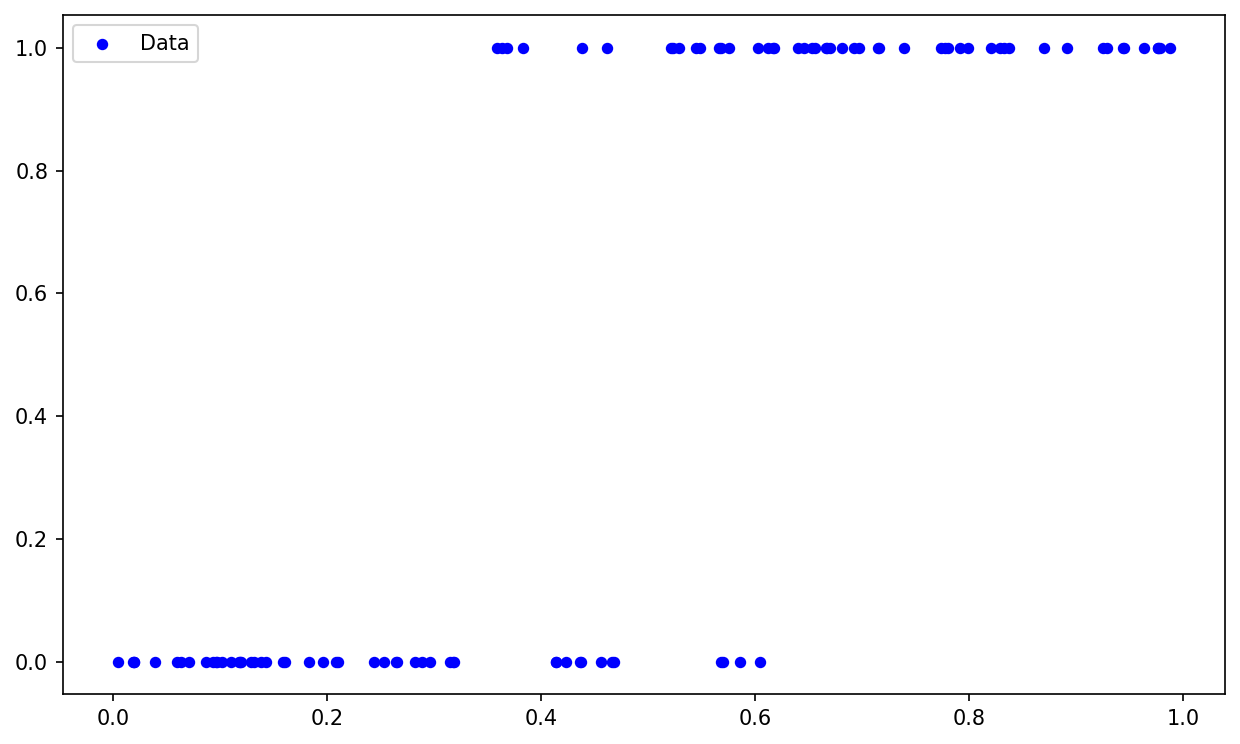

In [21]:
np.random.seed(0)

xcutoff = 0.5
x = np.random.rand(100,1)
y = [1 if (x_+0.4*np.random.random()-0.2) > xcutoff else 0 for x_ in x]

plt.figure(figsize =(10,6), dpi = 150)
plt.scatter(x, y, s = 20, color = 'blue', label = 'Data')
plt.legend()
plt.show()

In [22]:
n = x.shape[0]
x_train = np.c_[np.ones((n,1)),x]
beta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train)),np.dot(x_train.T, y))

In [23]:
mse = ((y - np.dot(x_train, beta))**2/n).sum()
print("MSE: ",mse)

MSE:  0.08893653944745838


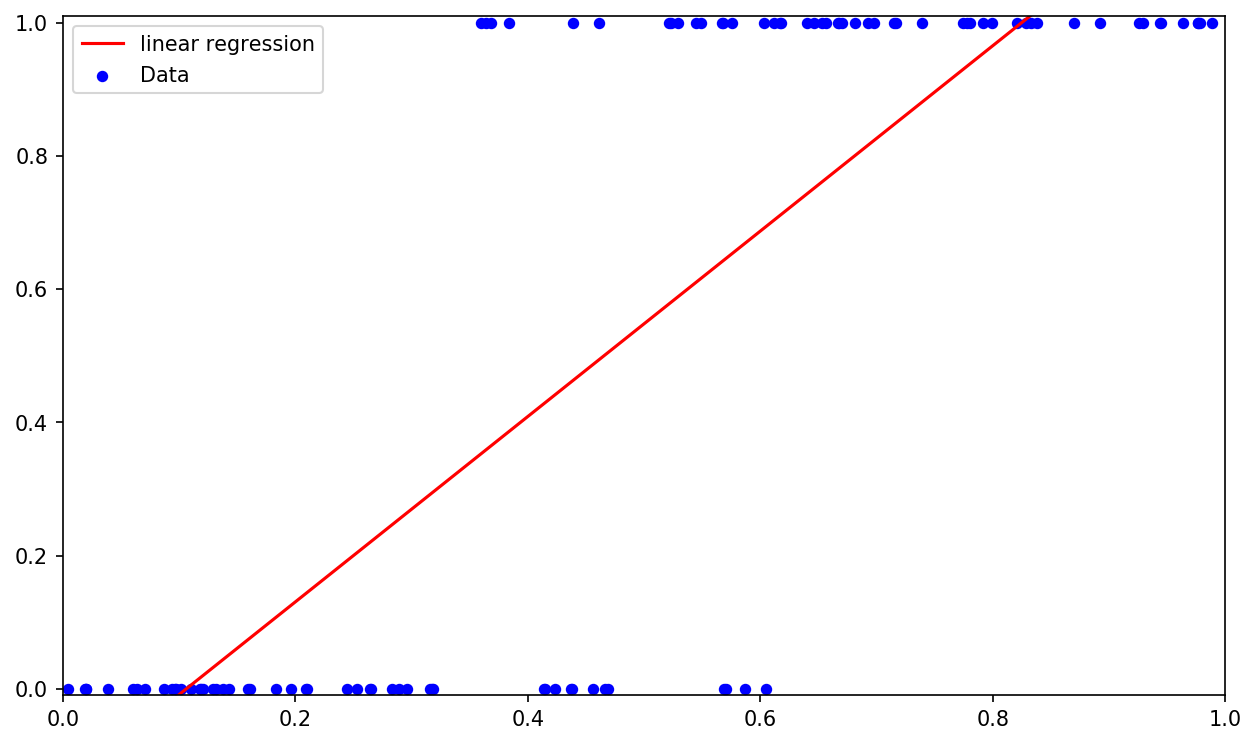

In [33]:
x_plot = np.linspace(0,1,100)

plt.figure(figsize =(10,6), dpi = 150)
plt.scatter(x, y, s = 20, color = 'blue', label = 'Data')
plt.plot(x_plot, beta[0] + x_plot*beta[1], color = 'red', label = 'linear regression')
plt.xlim(0,1.)
plt.ylim(-.01,1.01)
plt.legend()
plt.show()

In [31]:
def logit(x):
    return 1/(1+np.exp(-x))

In [38]:
n = x.shape[0]

x_train = np.c_[np.ones(n),x]
beta = np.zeros((x_train.shape[1],1))

n_iter = 2000
learning_rate = 0.8

for i in range(n_iter):
    y_lin = np.dot(x_train, beta)
    y_pred = logit(y_lin)
    c = (-1/n) * np.sum(y*np.log(y_pred.flatten()) + (1-np.array(y)) * np.log(1-y_pred.flatten()))
    gradient_vector = np.dot(x_train.T, y_pred - np.array([[i] for i in y]))
    if i % 100 == 0:
        print("iteratio:n",(i+1), "\tCost: ",c)
    beta -= learning_rate / n * gradient_vector

iteratio:n 1 	Cost:  0.6931471805599453
iteratio:n 101 	Cost:  0.36243072393715414
iteratio:n 201 	Cost:  0.30110422248157365
iteratio:n 301 	Cost:  0.27738317283225433
iteratio:n 401 	Cost:  0.2652653061131424
iteratio:n 501 	Cost:  0.2581338533941685
iteratio:n 601 	Cost:  0.2535637712629325
iteratio:n 701 	Cost:  0.2504643009397093
iteratio:n 801 	Cost:  0.24827576551607258
iteratio:n 901 	Cost:  0.24668333418727856
iteratio:n 1001 	Cost:  0.24549748626416829
iteratio:n 1101 	Cost:  0.24459804962355577
iteratio:n 1201 	Cost:  0.2439056344969394
iteratio:n 1301 	Cost:  0.24336602704978416
iteratio:n 1401 	Cost:  0.24294118342152027
iteratio:n 1501 	Cost:  0.24260379301491455
iteratio:n 1601 	Cost:  0.24233387016524027
iteratio:n 1701 	Cost:  0.24211654778643002
iteratio:n 1801 	Cost:  0.24194060920503208
iteratio:n 1901 	Cost:  0.2417974875673675


In [51]:
threshold = beta[0] / beta[1]
print("Threshold: ", threshold[0])

Threshold:  -0.46599236682562745


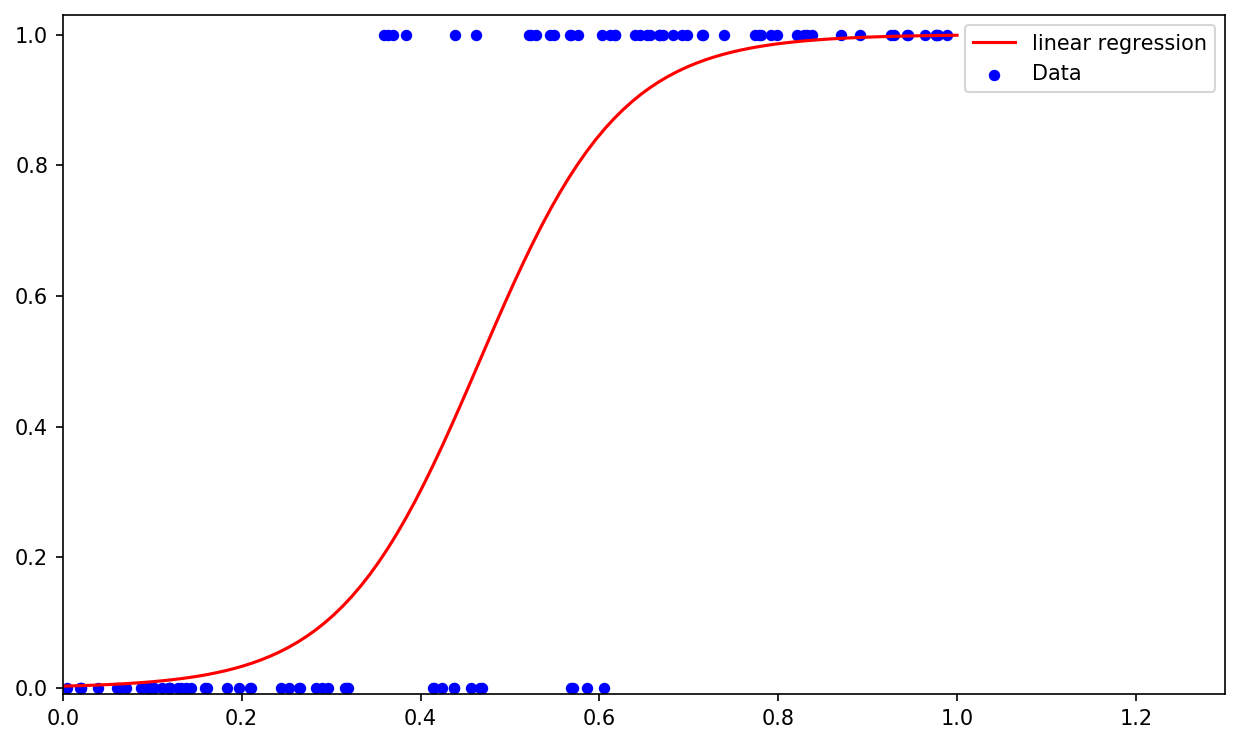

In [53]:
x_plot = np.linspace(0,1,100)

plt.figure(figsize =(10,6), dpi = 150)
plt.scatter(x, y, s = 20, color = 'blue', label = 'Data')
plt.plot(x_plot,logit(beta[0] + x_plot*beta[1]), color = 'red', label = 'linear regression')
plt.vlines(threshold, -0.02, 1.02, color='green')
plt.xlim(0,1.3)
plt.ylim(-.01,1.03)
plt.legend()
plt.show()